# CS381/780 Data Analytics Final Project

### Due on 12/9/2020 23:59 pm

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import random 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [4]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


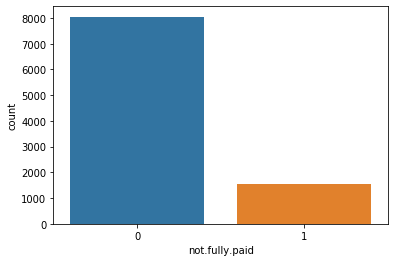

In [5]:
sns.countplot(df['not.fully.paid'])

### Good Luck !!!

Show all your work below

### Check for null

In [6]:
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [7]:
df = df.dropna(how='any', axis=0)
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [8]:
round(df.isnull().sum()/len(df.index), 2) * 100

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

### No missing values

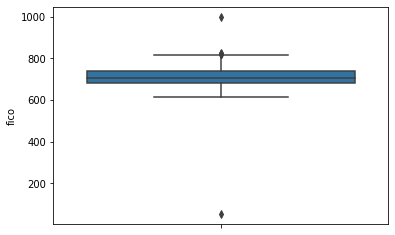

In [9]:
sns.boxplot(y=df['fico'])

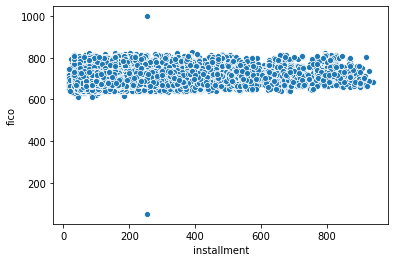

In [10]:
sns.scatterplot(x='installment', y='fico', data=df)

#### FICO ranges from 300-850, so we have some outliers

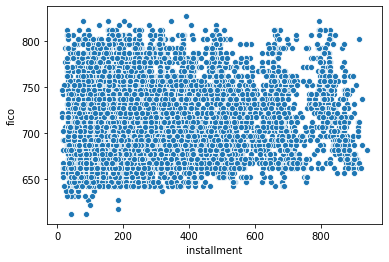

In [11]:
df = df[df['fico'] <= 850]
df = df[df['fico'] >= 300]
sns.scatterplot(x='installment', y='fico', data=df)

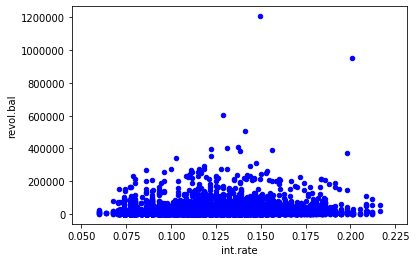

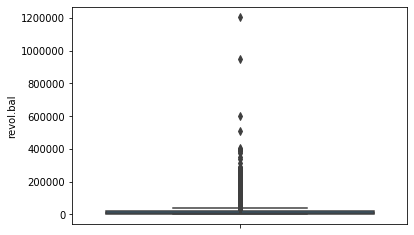

In [12]:
df.plot(kind='scatter', x='int.rate', y='revol.bal', color='blue')
plt.show()
sns.boxplot(y=df['revol.bal'])

### Some of the revolving balance are really high, because they are nowhere close to the average we can just remove them. 

In [13]:
df = df[df['revol.bal'] <= 80000]

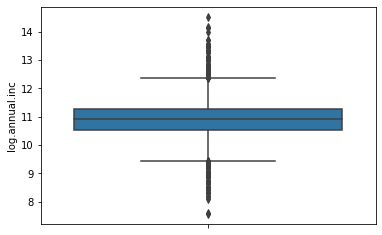

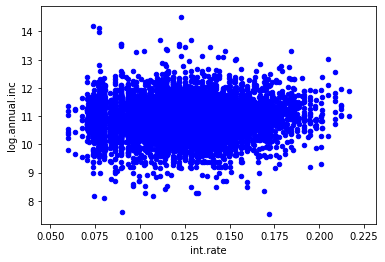

In [14]:
#sns.scatterplot(x='int.rate', y='revol.bal', data=df)
sns.boxplot(y=df['log.annual.inc'])
plt.show()
df.plot(kind='scatter', x='int.rate',y='log.annual.inc', color='blue')

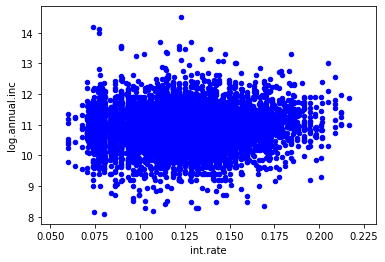

In [15]:
df = df[df['log.annual.inc'] > 8]
df.plot(kind='scatter', x='int.rate',y='log.annual.inc', color='blue')

### Removed some of the smaller outliers

### Cannot find any other outliers

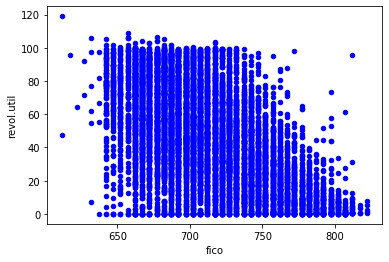

In [16]:
df.plot(kind='scatter', x='fico',y='revol.util', color='blue')

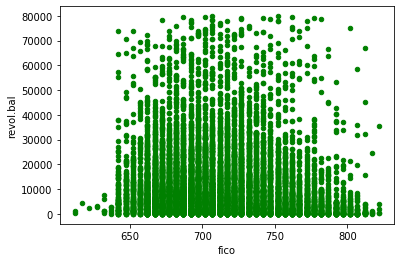

In [17]:
df.plot(kind='scatter', x='fico', y='revol.bal', color='green')

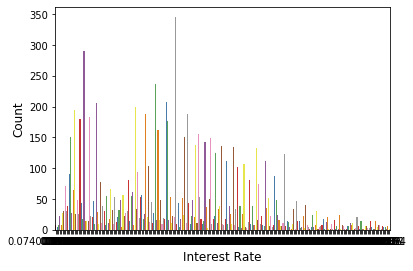

In [19]:
g = sns.countplot(x='int.rate', data=df, palette='Set1')
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9)

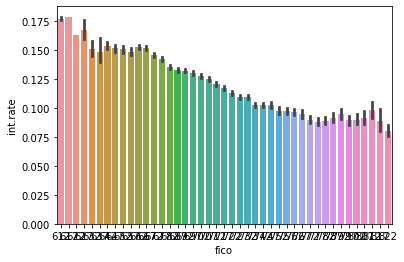

In [20]:
sns.barplot(x='fico', y='int.rate', data=df)

### As the credit score increases, the interest rate decreases

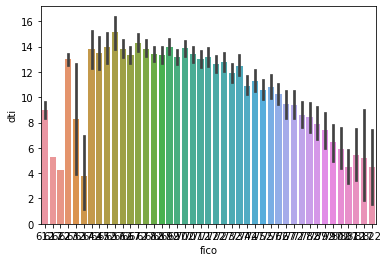

In [21]:
sns.barplot(x='fico', y='dti', data=df)

### As the fico score increases, the debt to income ratio decreases 

In [23]:
df2 = df
del df2['purpose']

In [24]:
df2.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Decision Tree

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import io
import pydot

X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('not.fully.paid', axis=1), df2['not.fully.paid'], test_size=0.20, random_state=101)
model = DecisionTreeClassifier(max_depth=10, criterion='entropy')
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
predictions = model.predict(X_test)
print('Decision Tree: \n')
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

Decision Tree: 

[[1483   85]
 [ 269   24]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1568
           1       0.22      0.08      0.12       293

    accuracy                           0.81      1861
   macro avg       0.53      0.51      0.51      1861
weighted avg       0.75      0.81      0.77      1861

0.8097796883396023


### Logistic Regression

In [26]:
model = LogisticRegression()
labels = np.array(df2['not.fully.paid'])
df2 = df2.drop('not.fully.paid', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(df2, labels, test_size=0.20, random_state=101)
model.fit(X_train, Y_train)
lg_predictions = model.predict(X_test)

print('Logistic Regression: \n')
print(classification_report(Y_test, lg_predictions))
print(accuracy_score(Y_test, lg_predictions))

Logistic Regression: 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1568
           1       0.30      0.01      0.02       293

    accuracy                           0.84      1861
   macro avg       0.57      0.50      0.47      1861
weighted avg       0.76      0.84      0.77      1861

0.8404083825900054


### SVM:

In [27]:
df3 = df.drop('not.fully.paid', axis=1)
model3 = svm.SVC(kernel='rdf', gamma=0.1)
X = df3
Y = df['not.fully.paid']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,)

In [28]:
svm_predictions = model.predict(X_test)

print('SVM: \n')
print(confusion_matrix(Y_test, svm_predictions))
print(classification_report(Y_test, svm_predictions))
print(accuracy_score(Y_test, svm_predictions))

SVM: 

[[1576    2]
 [ 282    1]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1578
           1       0.33      0.00      0.01       283

    accuracy                           0.85      1861
   macro avg       0.59      0.50      0.46      1861
weighted avg       0.77      0.85      0.78      1861

0.8473938742611499


### Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100)
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rfc_model.fit(X_train, y_train)
rfc_prediction = rfc_model.predict(X_test)
print(confusion_matrix(y_test, rfc_prediction))
print(classification_report(y_test, rfc_prediction))
print(accuracy_score(y_test, rfc_prediction))

[[1555    5]
 [ 296    5]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1560
           1       0.50      0.02      0.03       301

    accuracy                           0.84      1861
   macro avg       0.67      0.51      0.47      1861
weighted avg       0.79      0.84      0.77      1861

0.8382590005373455


### Cross validation for decision tree

In [37]:
accuracy = []
df_compare = df
#del df_compare['purpose']

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df_compare.drop('not.fully.paid', axis=1), df_compare['not.fully.paid'], test_size=0.20, random_state=random.randint(1,1000))
    new_model = DecisionTreeClassifier(max_depth=10, criterion='entropy')
    new_model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, pred))
    print('Accuracy Trial {}: {}'.format(i+1, accuracy[i]))
    

Accuracy Trial 1: 0.8259000537345513
Accuracy Trial 2: 0.8441698011821601
Accuracy Trial 3: 0.8414830736163353
Accuracy Trial 4: 0.8387963460505105
Accuracy Trial 5: 0.831810854379366
Accuracy Trial 6: 0.8490059108006448
Accuracy Trial 7: 0.8355722729715207
Accuracy Trial 8: 0.8473938742611499
Accuracy Trial 9: 0.8371843095110156
Accuracy Trial 10: 0.832348199892531


### Cross validation for logistic regression

In [38]:
accuracy = []
df_lg = df

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df_lg.drop('not.fully.paid', axis=1), df_lg['not.fully.paid'], test_size=0.20, random_state = random.randint(1,1000))
    super_model = LogisticRegression()
    super_model.fit(X_train, Y_train)
    pred_lg = super_model.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, pred_lg))
    print('Accuracy Trial {}: {}'.format(i+1, accuracy[i]))


Accuracy Trial 1: 0.8500806018269748
Accuracy Trial 2: 0.8366469639978507
Accuracy Trial 3: 0.830736163353036
Accuracy Trial 4: 0.8387963460505105
Accuracy Trial 5: 0.8398710370768404
Accuracy Trial 6: 0.8608275120902741
Accuracy Trial 7: 0.8500806018269748
Accuracy Trial 8: 0.8452444922084901
Accuracy Trial 9: 0.8565287479849544
Accuracy Trial 10: 0.8366469639978507


### Accuracy seems to be similar numbers